<a href="https://colab.research.google.com/github/lakshika-wijesundara/Plastic-and-Paper-Objects-detection-and-Classification/blob/main/Computer_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install ultralytics roboflow
from IPython.display import clear_output
clear_output()
print("Libraries installed successfully!")

# Authenticate Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="xv82Gavwdrn9ZZiy62Sc", model_format="yolov8")

# Download the dataset
dataset = rf.workspace().project("paper-and-plastic-detection-2").version(1).download(location="/content/computer_vision")
print("Dataset downloaded successfully!")


Libraries installed successfully!
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/computer_vision in yolov8:: 100%|██████████| 11108/11108 [00:07<00:00, 1530.73it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset downloaded successfully!


In [ ]:
from ultralytics import YOLO

# Initialize YOLOv8 model
model = YOLO("yolov8n.pt")

# Train the model
results = model.train(
    data="/content/computer_vision/data.yaml",
    epochs=10,
    batch=16,
    imgsz=640,
    name="paper_plastic_model"
)

# Confirm training completion
print("Training complete! Checkpoints are saved in:")
print(f"runs/detect/{model.model_name}")


100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]


Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/computer_vision/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=paper_plastic_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]


AMP: checks passed ✅


train: Scanning /content/computer_vision/train/labels... 3880 images, 6 backgrounds, 0 corrupt: 100%|██████████| 3880/3880 [00:01<00:00, 2088.56it/s]


train: New cache created: /content/computer_vision/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 568, len(boxes) = 5485. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/computer_vision/valid/labels... 1107 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1107/1107 [00:01<00:00, 1032.90it/s]


val: New cache created: /content/computer_vision/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 188, len(boxes) = 1607. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/paper_plastic_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/paper_plastic_model
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(

       1/10       2.2G     0.9342      2.118      1.394         12        640: 100%|██████████| 243/243 [02:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


                   all       1107       1607      0.667      0.567      0.604      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.16G      1.087      1.569      1.516          9        640: 100%|██████████| 243/243 [02:30<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]


                   all       1107       1607      0.597      0.559      0.617      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.16G      1.067      1.334      1.495         14        640: 100%|██████████| 243/243 [01:58<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.20it/s]

                   all       1107       1607      0.701      0.568      0.628      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.15G      1.008      1.186      1.451         17        640: 100%|██████████| 243/243 [02:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.19it/s]

                   all       1107       1607      0.697      0.636      0.695      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.17G     0.9332      1.042      1.394          9        640: 100%|██████████| 243/243 [01:59<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.28it/s]

                   all       1107       1607      0.811      0.677      0.769       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.17G     0.8804     0.9363      1.344         12        640: 100%|██████████| 243/243 [02:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.25it/s]


                   all       1107       1607      0.858      0.692      0.789      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.15G     0.8352     0.8619      1.301          9        640: 100%|██████████| 243/243 [02:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.21it/s]


                   all       1107       1607       0.85      0.732      0.807      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.15G      0.792     0.7945      1.272         10        640: 100%|██████████| 243/243 [02:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]

                   all       1107       1607      0.807        0.7      0.785      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.15G     0.7424     0.7235      1.225         14        640: 100%|██████████| 243/243 [02:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.26it/s]

                   all       1107       1607      0.838      0.762      0.844      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.15G     0.6961     0.6583      1.184         12        640: 100%|██████████| 243/243 [01:59<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.12it/s]

                   all       1107       1607      0.883      0.777       0.86      0.686



10 epochs completed in 0.395 hours.
Optimizer stripped from runs/detect/paper_plastic_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/paper_plastic_model/weights/best.pt, 6.2MB

Validating runs/detect/paper_plastic_model/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:22<00:00,  1.54it/s]


                   all       1107       1607      0.883      0.777       0.86      0.685
                 paper        386        534      0.853      0.665      0.782      0.597
        plastic bottle        722       1073      0.914      0.889      0.938      0.773
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/paper_plastic_model
Training complete! Checkpoints are saved in:
runs/detect/yolov8n.pt


In [ ]:
# Load the trained model (replace 'runs/detect/paper_plastic_model/weights/best.pt' with your model's path)
model = YOLO("runs/detect/paper_plastic_model/weights/best.pt")

# Run validation
results = model.val(
    data="/content/computer_vision/data.yaml",  # Path to data.yaml
    batch=16,                                  # Batch size
    imgsz=640                                  # Image size
)

# Print validation results
print("Validation Results:", results)


Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/computer_vision/valid/labels.cache... 1107 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1107/1107 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 188, len(boxes) = 1607. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:24<00:00,  2.90it/s]


                   all       1107       1607      0.886      0.773      0.861      0.686
                 paper        386        534      0.856      0.659      0.784      0.599
        plastic bottle        722       1073      0.915      0.887      0.938      0.774
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val
Validation Results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a33dc703340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,

In [ ]:
# Test the model using the test set
results = model.predict(
    source="/content/computer_vision/test/images",  # Path to test images
    save=True,                                      # Save predictions
    imgsz=640,                                      # Image size
    conf=0.25                                       # Confidence threshold
)

# Output predictions directory
print("Predictions saved in:", results[0].path)



image 1/561 /content/computer_vision/test/images/-127_jpg.rf.e9fcfa79c009052f7dbf38e4647ddc1e.jpg: 640x640 3 plastic bottles, 9.3ms
image 2/561 /content/computer_vision/test/images/-145_jpg.rf.cd3624e8248ee8e14327e1ba71f9861a.jpg: 448x640 3 plastic bottles, 36.0ms
image 3/561 /content/computer_vision/test/images/-187_jpg.rf.264bd9f1893e31ec250d28a87083a778.jpg: 640x640 1 plastic bottle, 8.0ms
image 4/561 /content/computer_vision/test/images/-190_jpg.rf.c65df6cfd273d7e2c0291006e18385a9.jpg: 640x640 1 plastic bottle, 7.3ms
image 5/561 /content/computer_vision/test/images/-229_jpg.rf.74811d478f891a23e441284f7c6e7956.jpg: 384x640 3 plastic bottles, 36.2ms
image 6/561 /content/computer_vision/test/images/-22_jpg.rf.36d93eaadd504f9528283a6c75e1f2d0.jpg: 640x480 1 plastic bottle, 34.2ms
image 7/561 /content/computer_vision/test/images/-25_jpg.rf.ed2e5c1c5634108e6fa495b827025f68.jpg: 640x640 1 plastic bottle, 8.0ms
image 8/561 /content/computer_vision/test/images/-265_jpg.rf.1d62c22553272276e

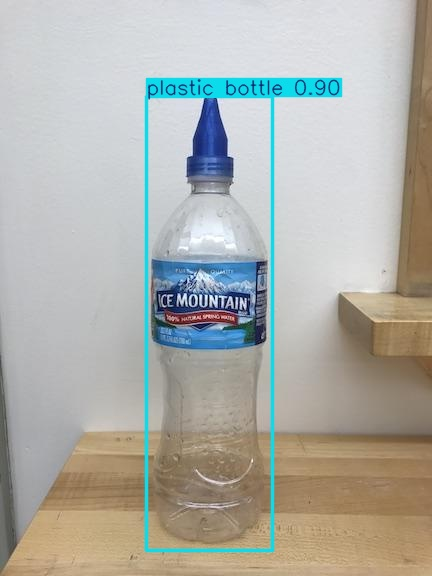

In [ ]:
# Example of displaying one prediction
from IPython.display import Image

Image(filename="/content/runs/detect/predict/100045_jpg.rf.c2745b040099ba1a99ee9c35a610ea5c.jpg")  # Replace 'image_name.jpg' with an actual test image filename


In [ ]:
# Validate the trained model
results = model.val(data="/content/computer_vision/data.yaml")  # Use your dataset YAML file

# Print validation results
print("Validation Metrics:")
print(f"mAP@0.5: {results.box.map50:.4f}")         # Mean Average Precision at IoU 0.5
print(f"mAP@0.5:0.95: {results.box.map:.4f}")     # Mean Average Precision at IoU 0.5:0.95
# Accessing precision for a specific class (e.g., the first class)
print(f"Precision: {results.box.p[0]:.4f}")  # Precision for class 0
print(f"Recall: {results.box.r[0]:.4f}")        # Recall for class 0

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/computer_vision/valid/labels.cache... 1107 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1107/1107 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 188, len(boxes) = 1607. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:24<00:00,  2.90it/s]


                   all       1107       1607      0.886      0.773      0.861      0.686
                 paper        386        534      0.856      0.659      0.784      0.599
        plastic bottle        722       1073      0.915      0.887      0.938      0.774
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val5
Validation Metrics:
mAP@0.5: 0.8610
mAP@0.5:0.95: 0.6863
Precision: 0.8564
Recall: 0.6590


In [ ]:
results = model.train(
    data="/content/computer_vision/data.yaml",
    epochs=20,
    batch=16,
    imgsz=640,
    name="fine_tuned_model",
    model="runs/detect/paper_plastic_model/weights/best.pt",
    lr0=0.001,
    freeze=10,
    augment=True,
    patience=5,
    optimizer="Adam"
   )


In [ ]:

precision = results.box.p  # Precision for each class
recall = results.box.r     # Recall for each class
f1_score = results.box.f1  # F1 score for each class
ap50 = results.box.ap50    # AP at IoU 0.5
map50_95 = results.box.map  # mAP at IoU thresholds 0.5:0.95

# Print metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"AP50: {ap50}")
print(f"mAP50-95: {map50_95}")


Precision: [    0.85641      0.9154]
Recall: [    0.65895     0.88743]
F1 Score: [    0.74481      0.9012]
AP50: [    0.78416     0.93778]
mAP50-95: 0.6863170247100296


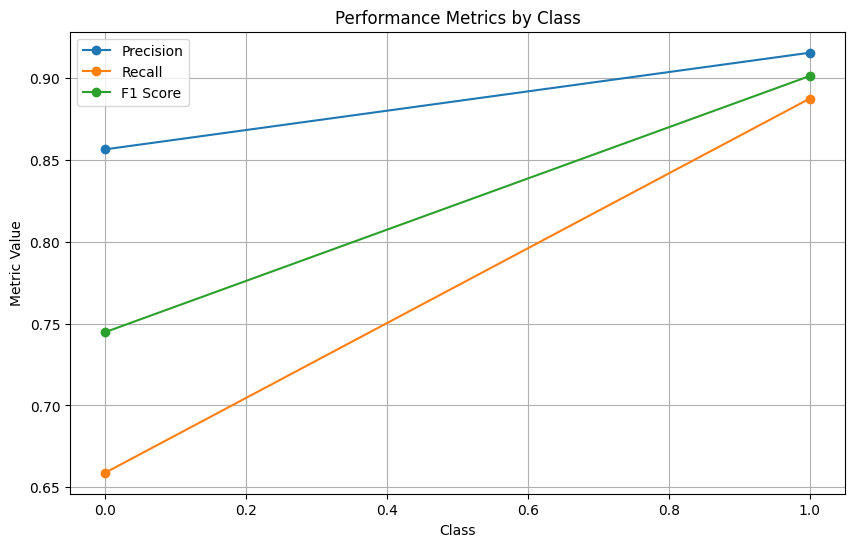

In [ ]:
import matplotlib.pyplot as plt

# Visualizing precision, recall, and F1-score for each class
classes = list(range(len(precision)))  # Replace with actual class names if available
plt.figure(figsize=(10, 6))

plt.plot(classes, precision, label="Precision", marker='o')
plt.plot(classes, recall, label="Recall", marker='o')
plt.plot(classes, f1_score, label="F1 Score", marker='o')

plt.xlabel("Class")
plt.ylabel("Metric Value")
plt.title("Performance Metrics by Class")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Install Gradio
!pip install gradio
from ultralytics import YOLO
import gradio as gr
from PIL import Image

# Load the trained YOLO model
model = YOLO("runs/detect/paper_plastic_model/weights/best.pt")  # Replace with your model path

# Function to handle prediction
def predict_image(image):
    # Run YOLO prediction
    results = model.predict(source=image, conf=0.25, imgsz=640)

    # Extract labels and confidence scores
    detected_objects = []
    for box in results[0].boxes:
        label = results[0].names[int(box.cls[0])]  # Get class name
        confidence = box.conf[0].item()           # Get confidence
        detected_objects.append(f"{label} ({confidence:.2f})")

    # Format the result
    if detected_objects:
        return f"Detected Objects: {', '.join(detected_objects)}"
    else:
        return "No objects detected."

# Gradio interface
interface = gr.Interface(
    fn=predict_image,  # Function to call
    inputs=gr.Image(type="filepath"),  # Input type
    outputs="text",  # Output type
    title="Paper and Plastic Detection",
    description="Upload an image to detect objects as Paper or Plastic.",
)

# Launch the interface
interface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://18443c07809362ddd9.gradio.live

This share link expires in 72 hours

In [ ]:
# Validate the fine-tuned model
results = model.val(data="/content/computer_vision/data.yaml")

# Print validation metrics
print("Validation Metrics After Fine-Tuning:")
print(f"mAP@0.5: {results.box.map50:.4f}")         # Mean Average Precision at IoU 0.5
print(f"mAP@0.5:0.95: {results.box.map:.4f}")     # Mean Average Precision at IoU 0.5:0.95
print(f"Precision: {results.box.p.mean():.4f}")   # Average Precision
print(f"Recall: {results.box.r.mean():.4f}")      # Average Recall


Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/computer_vision/valid/labels.cache... 1107 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1107/1107 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 188, len(boxes) = 1607. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:27<00:00,  2.55it/s]


                   all       1107       1607       0.85      0.825      0.885      0.721
                 paper        386        534       0.82       0.73      0.821      0.639
        plastic bottle        722       1073       0.88      0.919       0.95      0.803
Speed: 0.3ms preprocess, 4.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/fine_tuned_model2
Validation Metrics After Fine-Tuning:
mAP@0.5: 0.8855
mAP@0.5:0.95: 0.7211
Precision: 0.8496
Recall: 0.8246
